# Gradient Boosting Machine performance report


In [1]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import classification_report
import joblib
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
import datetime


In [2]:
#%% read in df
p_loc = 'C:/Users/joa24jm/Documents/tinnitus-country/'

df = pd.read_csv(p_loc + 'data/03_processed/df_equal_splits_with_age.csv')

### Determine features and split data

In [3]:
features = ['AT', 'CA', 'CH','DE','GB', 'IT', 'NL', 'NO', 'RU', 'US', # countries
            'autumn', 'spring', 'summer', 'winter',                  # season
            'Male', 'age',                                 # demographics
            'question4', 'question5', 'question6', 'question7'
            ]      # EMAs

X = df[features] # all columns except for the last
y = df['question1']  # last col as target


# split up data into train and test, stratify on y, set random_state and shuffle
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 42,
                                                    shuffle = True,
                                                    stratify = y)

In [4]:
# read in trained model
clf = joblib.load(p_loc + 'results/04_models/best_estimator/gb_21_06_25_11_54.pkl')

In [5]:
# predict unseen data
y_pred = clf.predict(x_test)

### Classification report

In [6]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.98      0.94     17709
         1.0       0.98      0.90      0.94     17708

    accuracy                           0.94     35417
   macro avg       0.94      0.94      0.94     35417
weighted avg       0.94      0.94      0.94     35417



### Confusion Matrix

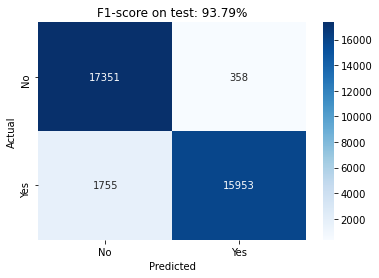

In [8]:
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot = True,
            fmt = 'd', cmap = 'Blues')
ax.set_xticklabels(['No', 'Yes'])
ax.set_yticklabels(['No', 'Yes'])

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

acc = f1_score(y_test, y_pred)

ax.set_title('F1-score on test: {:.2%}'.format(acc))

plt.savefig(p_loc + 'results/07_plots/gbm_confusion.svg')